In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy.stats import f_oneway
from scipy.stats import kruskal
import scipy.stats as stats

# 한글 폰트 설정
plt.rc('font', family ='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 활동소비내역 테이블 전처리

In [3]:
# colab에서 드라이브 마운트 후, 파일 경로 변수에 담기
consume_filepath_east_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/east/ts/tn_activity_consume_his_활동소비내역_B.csv'
consume_filepath_east_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/east/vs/tn_activity_consume_his_활동소비내역_B.csv'

consume_filepath_west_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/west/ts/tn_activity_consume_his_활동소비내역_C.csv'
consume_filepath_west_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/west/vs/tn_activity_consume_his_활동소비내역_C.csv'

consume_filepath_capital_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/capital/ts/tn_activity_consume_his_활동소비내역_A.csv'
consume_filepath_capital_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/capital/vs/tn_activity_consume_his_활동소비내역_A.csv'

consume_filepath_jeju_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/jeju/ts/tn_activity_consume_his_활동소비내역_D.csv'
consume_filepath_jeju_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/jeju/vs/tn_activity_consume_his_활동소비내역_D.csv'


# CSV 파일 -> Dataframe으로 읽어오기
def load_data(filepath):
  return pd.read_csv(filepath)

activity_consume_east_ts = load_data(consume_filepath_east_ts)
activity_consume_east_vs = load_data(consume_filepath_east_vs)

activity_consume_west_ts = load_data(consume_filepath_west_ts)
activity_consume_west_vs = load_data(consume_filepath_west_vs)

activity_consume_capital_ts = load_data(consume_filepath_capital_ts)
activity_consume_capital_vs = load_data(consume_filepath_capital_vs)

activity_consume_jeju_ts = load_data(consume_filepath_jeju_ts)
activity_consume_jeju_vs = load_data(consume_filepath_jeju_vs)


In [4]:
activity_consume_east_ts.info()
activity_consume_west_ts.info()
activity_consume_capital_ts.info()
activity_consume_jeju_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19824 entries, 0 to 19823
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TRAVEL_ID          19824 non-null  object 
 1   VISIT_AREA_ID      19824 non-null  int64  
 2   ACTIVITY_TYPE_CD   19824 non-null  int64  
 3   ACTIVITY_TYPE_SEQ  19824 non-null  int64  
 4   CONSUME_HIS_SEQ    19824 non-null  int64  
 5   CONSUME_HIS_SNO    19824 non-null  int64  
 6   PAYMENT_NUM        19824 non-null  int64  
 7   BRNO               14995 non-null  float64
 8   STORE_NM           19617 non-null  object 
 9   ROAD_NM_ADDR       17498 non-null  object 
 10  LOTNO_ADDR         11823 non-null  object 
 11  ROAD_NM_CD         15782 non-null  float64
 12  LOTNO_CD           15782 non-null  float64
 13  PAYMENT_DT         16456 non-null  object 
 14  PAYMENT_MTHD_SE    19702 non-null  float64
 15  PAYMENT_AMT_WON    19822 non-null  float64
 16  PAYMENT_ETC        118

In [5]:
activity_consume_east_vs.info()
activity_consume_west_vs.info()
activity_consume_capital_vs.info()
activity_consume_jeju_vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TRAVEL_ID          2478 non-null   object 
 1   VISIT_AREA_ID      2478 non-null   int64  
 2   ACTIVITY_TYPE_CD   2478 non-null   int64  
 3   ACTIVITY_TYPE_SEQ  2478 non-null   int64  
 4   CONSUME_HIS_SEQ    2478 non-null   int64  
 5   CONSUME_HIS_SNO    2478 non-null   int64  
 6   PAYMENT_NUM        2478 non-null   int64  
 7   BRNO               1923 non-null   float64
 8   STORE_NM           2455 non-null   object 
 9   ROAD_NM_ADDR       2221 non-null   object 
 10  LOTNO_ADDR         1516 non-null   object 
 11  ROAD_NM_CD         2007 non-null   float64
 12  LOTNO_CD           2007 non-null   float64
 13  PAYMENT_DT         2083 non-null   object 
 14  PAYMENT_MTHD_SE    2464 non-null   float64
 15  PAYMENT_AMT_WON    2477 non-null   float64
 16  PAYMENT_ETC        1487 

In [6]:
# DataFrame 합치기 (행 기준으로 아래로 붙이기)
## ignore_index = True : 기존 인덱스를 무시하고 새로 인덱스를 부여
## 만약 컬럼 이름이나 순서가 다르면, 없는 칼럼은 NaN으로 채워짐
def merge_data(*filenames):
  return pd.concat(filenames, ignore_index = True)

activity_consume_merged = merge_data(
    activity_consume_east_ts, activity_consume_east_vs,
    activity_consume_west_ts, activity_consume_west_vs,
    activity_consume_capital_ts, activity_consume_capital_vs,
    activity_consume_jeju_ts, activity_consume_jeju_vs)
activity_consume_merged

,TRAVEL_ID,VISIT_AREA_ID,ACTIVITY_TYPE_CD,ACTIVITY_TYPE_SEQ,CONSUME_HIS_SEQ,CONSUME_HIS_SNO,PAYMENT_NUM,BRNO,STORE_NM,ROAD_NM_ADDR,LOTNO_ADDR,ROAD_NM_CD,LOTNO_CD,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC,SGG_CD
0,b_b011174,2210240003,2,1,1,1,1,NaN,코레일유통,대구 동구 동대구로 550,NaN,3007004.0,2.714010e+09,2022-10-24 19:16:00.000,1.0,8000.0,NaN,NaN
1,b_b004534,2210010001,1,0,0,1,3,7.083900e+09,방하착커피앤베이커리,강원 속초시 설악산로 1096,강원 속초시 설악동 151,3223005.0,4.221011e+09,2022-10-01 10:52:00.000,1.0,18000.0,아이스아메리카노,NaN
2,b_b005652,2210120003,1,0,0,1,1,1.728701e+09,내류사,경북 경주시 영불로 263-7,경북 경주시 진현동 71-10,3305043.0,4.713013e+09,2022-10-12 11:29:00.000,1.0,5800.0,ICE바닐라라떼,NaN
3,b_b006597,2210160004,2,4,4,0,2,NaN,베스트할인마트,부산시 동래구 복천로5번길 34 상가동103호,NaN,NaN,NaN,NaN,1.0,1400.0,NaN,2.626010e+09
4,b_b002171,2208210004,1,0,0,1,2,8.081601e+09,도문,강원 속초시 상도문1길 31,강원 속초시 도문동 206-1,4469108.0,4.221011e+09,2022-08-21 11:34:00.000,1.0,11000.0,아메리카노(ICE),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97455,d_d000150,2208140008,3,0,0,1,1,2.212751e+09,금능석물원,제주특별자치도 제주시 한림읍 한림로 176,제주특별자치도 제주시 한림읍 금능리 1282-9,3349208.0,5.011025e+09,2022-08-14 14:00:00.000,1.0,4000.0,성인(20세이상,NaN
97456,d_d004817,2210270015,1,0,0,1,2,1.051946e+09,콜럼버스,제주특별자치도 제주시 구좌읍 세화4길 10,제주특별자치도 제주시 구좌읍 세화리 1448-1,4848012.0,5.011026e+09,2022-10-27 19:12:00.000,1.0,132000.0,배꼽살&대뱃살;풍정사계-춘;오믈렛 국물떡볶이,NaN
97457,b_b000051,2209100007,1,4,4,1,4,6.120184e+09,대전광봉횟집,경남 통영시 미수해안로 120,경남 통영시 미수동 8-1,3333009.0,4.822012e+09,2022-09-10 20:24:00.000,1.0,50000.0,NaN,NaN
97458,d_d000431,2208240003,1,1,1,1,6,6.163059e+09,씨유협재제천점,제주특별자치도 제주시 한림읍 한림로 329-8,제주특별자치도 제주시 한림읍 협재리 2447-43,3349208.0,5.011025e+09,2022-08-24 15:46:00.000,1.0,15800.0,탱글탱글샤인머스캣;자일리톨F빅팩껌;토레타P900ML;더하다옥수수P500ML;자연은제...,NaN


In [7]:
# 중복 제거
def deduplicate_data(filename):
  filename.drop_duplicates(inplace = True)
  return filename

activity_consume_merged = deduplicate_data(activity_consume_merged)
activity_consume_merged

,TRAVEL_ID,VISIT_AREA_ID,ACTIVITY_TYPE_CD,ACTIVITY_TYPE_SEQ,CONSUME_HIS_SEQ,CONSUME_HIS_SNO,PAYMENT_NUM,BRNO,STORE_NM,ROAD_NM_ADDR,LOTNO_ADDR,ROAD_NM_CD,LOTNO_CD,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC,SGG_CD
0,b_b011174,2210240003,2,1,1,1,1,NaN,코레일유통,대구 동구 동대구로 550,NaN,3007004.0,2.714010e+09,2022-10-24 19:16:00.000,1.0,8000.0,NaN,NaN
1,b_b004534,2210010001,1,0,0,1,3,7.083900e+09,방하착커피앤베이커리,강원 속초시 설악산로 1096,강원 속초시 설악동 151,3223005.0,4.221011e+09,2022-10-01 10:52:00.000,1.0,18000.0,아이스아메리카노,NaN
2,b_b005652,2210120003,1,0,0,1,1,1.728701e+09,내류사,경북 경주시 영불로 263-7,경북 경주시 진현동 71-10,3305043.0,4.713013e+09,2022-10-12 11:29:00.000,1.0,5800.0,ICE바닐라라떼,NaN
3,b_b006597,2210160004,2,4,4,0,2,NaN,베스트할인마트,부산시 동래구 복천로5번길 34 상가동103호,NaN,NaN,NaN,NaN,1.0,1400.0,NaN,2.626010e+09
4,b_b002171,2208210004,1,0,0,1,2,8.081601e+09,도문,강원 속초시 상도문1길 31,강원 속초시 도문동 206-1,4469108.0,4.221011e+09,2022-08-21 11:34:00.000,1.0,11000.0,아메리카노(ICE),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97455,d_d000150,2208140008,3,0,0,1,1,2.212751e+09,금능석물원,제주특별자치도 제주시 한림읍 한림로 176,제주특별자치도 제주시 한림읍 금능리 1282-9,3349208.0,5.011025e+09,2022-08-14 14:00:00.000,1.0,4000.0,성인(20세이상,NaN
97456,d_d004817,2210270015,1,0,0,1,2,1.051946e+09,콜럼버스,제주특별자치도 제주시 구좌읍 세화4길 10,제주특별자치도 제주시 구좌읍 세화리 1448-1,4848012.0,5.011026e+09,2022-10-27 19:12:00.000,1.0,132000.0,배꼽살&대뱃살;풍정사계-춘;오믈렛 국물떡볶이,NaN
97457,b_b000051,2209100007,1,4,4,1,4,6.120184e+09,대전광봉횟집,경남 통영시 미수해안로 120,경남 통영시 미수동 8-1,3333009.0,4.822012e+09,2022-09-10 20:24:00.000,1.0,50000.0,NaN,NaN
97458,d_d000431,2208240003,1,1,1,1,6,6.163059e+09,씨유협재제천점,제주특별자치도 제주시 한림읍 한림로 329-8,제주특별자치도 제주시 한림읍 협재리 2447-43,3349208.0,5.011025e+09,2022-08-24 15:46:00.000,1.0,15800.0,탱글탱글샤인머스캣;자일리톨F빅팩껌;토레타P900ML;더하다옥수수P500ML;자연은제...,NaN


In [8]:
print(activity_consume_merged.columns)

Index(['TRAVEL_ID', 'VISIT_AREA_ID', 'ACTIVITY_TYPE_CD', 'ACTIVITY_TYPE_SEQ',
       'CONSUME_HIS_SEQ', 'CONSUME_HIS_SNO', 'PAYMENT_NUM', 'BRNO', 'STORE_NM',
       'ROAD_NM_ADDR', 'LOTNO_ADDR', 'ROAD_NM_CD', 'LOTNO_CD', 'PAYMENT_DT',
       'PAYMENT_MTHD_SE', 'PAYMENT_AMT_WON', 'PAYMENT_ETC', 'SGG_CD'],
      dtype='object')


In [9]:
# 필요한 컬럼만 남기기
activity_consume_columns = ['TRAVEL_ID', 'PAYMENT_NUM', 'PAYMENT_AMT_WON']

def filter_data(filename, columns):
  filtered_data = filename[columns]
  return filtered_data

activity_consume = filter_data(activity_consume_merged, activity_consume_columns)

In [10]:
activity_consume

,TRAVEL_ID,PAYMENT_NUM,PAYMENT_AMT_WON
0,b_b011174,1,8000.0
1,b_b004534,3,18000.0
2,b_b005652,1,5800.0
3,b_b006597,2,1400.0
4,b_b002171,2,11000.0
...,...,...,...
97455,d_d000150,1,4000.0
97456,d_d004817,2,132000.0
97457,b_b000051,4,50000.0
97458,d_d000431,6,15800.0


In [11]:
# 소비 금액, 소비 인원이 0인 경우 제거
activity_consume = activity_consume[activity_consume['PAYMENT_NUM'] > 0]
activity_consume = activity_consume[activity_consume['PAYMENT_AMT_WON'] > 0]



# 각 행 기준으로 1인당 소비금액 계산
activity_consume['1인당소비금액'] = activity_consume['PAYMENT_AMT_WON'] / activity_consume['PAYMENT_NUM']

In [12]:
activity_consume

,TRAVEL_ID,PAYMENT_NUM,PAYMENT_AMT_WON,1인당소비금액
0,b_b011174,1,8000.0,8000.000000
1,b_b004534,3,18000.0,6000.000000
2,b_b005652,1,5800.0,5800.000000
3,b_b006597,2,1400.0,700.000000
4,b_b002171,2,11000.0,5500.000000
...,...,...,...,...
97455,d_d000150,1,4000.0,4000.000000
97456,d_d004817,2,132000.0,66000.000000
97457,b_b000051,4,50000.0,12500.000000
97458,d_d000431,6,15800.0,2633.333333


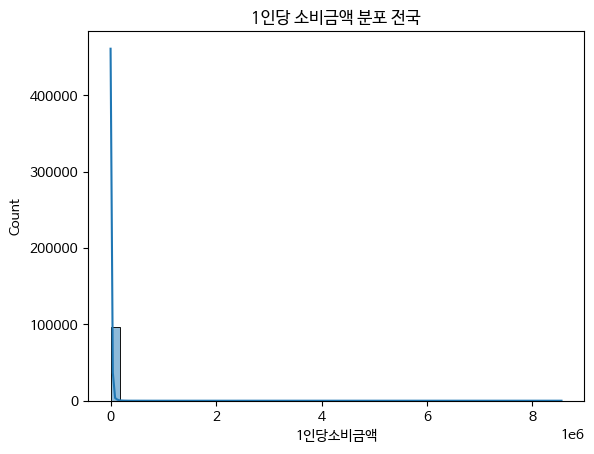

In [13]:
# 분포 확인
## sns.histplot() : Seaborn의 히스토그램 함수. 수치형 데이터의 빈도 분포를 시각화.
## bins = 50 : 막대(빈)의 개수를 50개로 설정. 전체 소비금액 범위를 50개의 구간으로 나누고, 각 구간마다 몇 개의 값이 들어있는지 세는 방식.
## kde = True : KDE(Kernel Density Estimation)를 함께 그림. 즉, 분포의 부드러운 곡선형 밀도 추정선을 그림.
sns.histplot(activity_consume['1인당소비금액'], bins = 50, kde = True)
plt.title("1인당 소비금액 분포 전국")
plt.show()

In [14]:
# 왜도 확인
## 왜도 > 0 : 오른쪽 꼬리가 긴 분포 (Positive Skew) → 평균 > 중앙값
## 왜도 < 0 : 왼쪽 꼬리가 긴 분포 (Negative Skew) → 평균 < 중앙값
activity_consume['1인당소비금액'].skew()

np.float64(96.90199152781305)

In [15]:
# 이상치 확인
Q1 = activity_consume['PAYMENT_AMT_WON'].quantile(0.25)
Q3 = activity_consume['PAYMENT_AMT_WON'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# PAYMENT_AMT_WON 값이 하한보다 작은 경우 (< lower_bound) 또는(|) 상한보다 큰 경우 (> upper_bound), outliers 변수에 담기
outliers = activity_consume[(activity_consume['PAYMENT_AMT_WON'] < lower_bound) |
                             (activity_consume['PAYMENT_AMT_WON'] > upper_bound)]
print("이상치 개수:", len(outliers))

이상치 개수: 7455


In [16]:
# 여행 단위로 중앙 값 계산
activity_consume_median = activity_consume.groupby('TRAVEL_ID', as_index=False)['1인당소비금액'].median().round(2)
activity_consume_median.columns = ['TRAVEL_ID', '1인당소비금액(중앙값)']
activity_consume_median

,TRAVEL_ID,1인당소비금액(중앙값)
0,a_a000007,5000.00
1,a_a000011,17507.50
2,a_a000012,8950.00
3,a_a000013,14333.33
4,a_a000014,4156.25
...,...,...
15607,d_d012488,9880.00
15608,d_d012489,27500.00
15609,d_d012490,26000.00
15610,d_d012491,7775.00


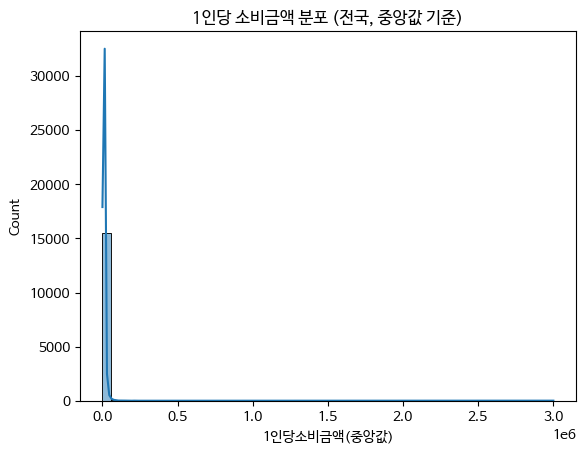

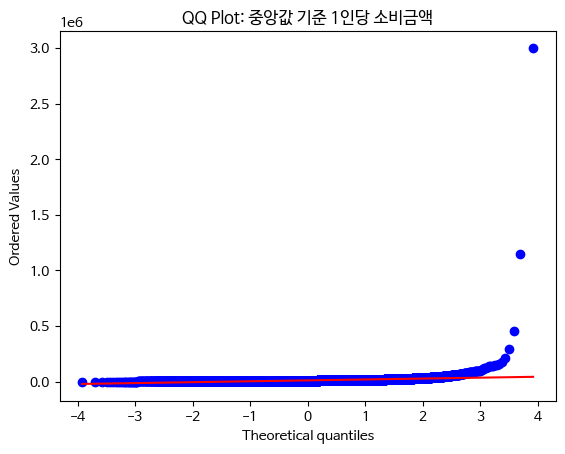

Shapiro-Wilk Test: stat = 0.0892, p-value = 9.228048967259224e-126


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15612.
  res = hypotest_fun_out(*samples, **kwds)


In [17]:
# 정규성 검정

## 1. 시각화
sns.histplot(activity_consume_median['1인당소비금액(중앙값)'], bins=50, kde=True)
plt.title("1인당 소비금액 분포 (전국, 중앙값 기준)")
plt.show()

## 2. QQ Plot
### 의미: 데이터의 분위수(quantile)와 정규분포의 분위수를 비교해 시각적으로 정규성 여부 판단
### 빨간 직선: 이론적인 정규분포 분위수 / 파란 점: 실제 데이터의 분위수
### 만약 정규분포를 따른다면 → 점들이 거의 직선 위에 있어야 함
stats.probplot(activity_consume_median['1인당소비금액(중앙값)'], dist="norm", plot=plt)
plt.title("QQ Plot: 중앙값 기준 1인당 소비금액")
plt.show()

## 3. Shapiro-Wilk Test
### p-value < 0.05: 귀무가설 기각 → 정규분포 아님
stat, p = stats.shapiro(activity_consume_median['1인당소비금액(중앙값)'])
print(f"Shapiro-Wilk Test: stat = {stat:.4f}, p-value = {p}")

**이상치가 많으므로 중앙 값 사용**

In [18]:
# 데이터 확인용 csv 파일 저장
activity_consume_median.to_csv('activity_consume_median.csv', index=False, encoding='utf-8')

# 동반자정보 테이블 전처리

In [19]:
companion_filepath_east_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/east/ts/tn_companion_info_동반자정보_B.csv'
companion_filepath_east_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/east/vs/tn_companion_info_동반자정보_B.csv'

companion_filepath_west_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/west/ts/tn_companion_info_동반자정보_C.csv'
companion_filepath_west_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/west/vs/tn_companion_info_동반자정보_C.csv'

companion_filepath_capital_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/capital/ts/tn_companion_info_동반자정보_A.csv'
companion_filepath_capital_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/capital/vs/tn_companion_info_동반자정보_A.csv'

companion_filepath_jeju_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/jeju/ts/tn_companion_info_동반자정보_D.csv'
companion_filepath_jeju_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/jeju/vs/tn_companion_info_동반자정보_D.csv'

companion_info_east_ts = load_data(companion_filepath_east_ts)
companion_info_east_vs = load_data(companion_filepath_east_vs)

companion_info_west_ts = load_data(companion_filepath_west_ts)
companion_info_west_vs = load_data(companion_filepath_west_vs)

companion_info_capital_ts = load_data(companion_filepath_capital_ts)
companion_info_capital_vs = load_data(companion_filepath_capital_vs)

companion_info_jeju_ts = load_data(companion_filepath_jeju_ts)
companion_info_jeju_vs = load_data(companion_filepath_jeju_vs)

In [20]:
companion_info_east_ts.info()
companion_info_west_ts.info()
companion_info_capital_ts.info()
companion_info_jeju_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4932 entries, 0 to 4931
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   COMPANION_SEQ        4932 non-null   int64 
 1   TRAVEL_ID            4932 non-null   object
 2   REL_CD               4932 non-null   int64 
 3   COMPANION_GENDER     4932 non-null   int64 
 4   COMPANION_AGE_GRP    4932 non-null   int64 
 5   COMPANION_SITUATION  4932 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 231.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4741 entries, 0 to 4740
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   COMPANION_SEQ        4741 non-null   int64 
 1   TRAVEL_ID            4741 non-null   object
 2   REL_CD               4741 non-null   int64 
 3   COMPANION_GENDER     4741 non-null   int64 
 4   COMPANION_AGE_GRP    4741 non-null   int64 
 

In [21]:
companion_info_east_vs.info()
companion_info_west_vs.info()
companion_info_capital_vs.info()
companion_info_jeju_vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   COMPANION_SEQ        616 non-null    int64 
 1   TRAVEL_ID            616 non-null    object
 2   REL_CD               616 non-null    int64 
 3   COMPANION_GENDER     616 non-null    int64 
 4   COMPANION_AGE_GRP    616 non-null    int64 
 5   COMPANION_SITUATION  616 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 29.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   COMPANION_SEQ        592 non-null    int64 
 1   TRAVEL_ID            592 non-null    object
 2   REL_CD               592 non-null    int64 
 3   COMPANION_GENDER     592 non-null    int64 
 4   COMPANION_AGE_GRP    592 non-null    int64 
 5   C

In [22]:
companion_info_merged = merge_data(
    companion_info_east_ts, companion_info_east_vs,
    companion_info_west_ts, companion_info_west_vs,
    companion_info_capital_ts, companion_info_capital_vs,
    companion_info_jeju_ts, companion_info_jeju_vs)
companion_info_merged

,COMPANION_SEQ,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP,COMPANION_SITUATION
0,1,b_b002151,1,1,6,1
1,5,b_b004786,6,2,4,3
2,1,b_b002864,1,1,7,1
3,1,b_b011077,2,2,1,1
4,3,b_b000838,2,1,1,1
...,...,...,...,...,...,...
21051,5,c_c000583,7,2,3,1
21052,4,d_d001984,2,2,1,1
21053,1,d_d010596,8,1,3,1
21054,1,b_b000543,1,1,6,1


In [23]:
companion_info_merged = deduplicate_data(companion_info_merged)
companion_info_merged

,COMPANION_SEQ,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP,COMPANION_SITUATION
0,1,b_b002151,1,1,6,1
1,5,b_b004786,6,2,4,3
2,1,b_b002864,1,1,7,1
3,1,b_b011077,2,2,1,1
4,3,b_b000838,2,1,1,1
...,...,...,...,...,...,...
21051,5,c_c000583,7,2,3,1
21052,4,d_d001984,2,2,1,1
21053,1,d_d010596,8,1,3,1
21054,1,b_b000543,1,1,6,1


In [24]:
companion_info_columns = ['TRAVEL_ID', 'REL_CD', 'COMPANION_SITUATION']
companion_info = filter_data(companion_info_merged, companion_info_columns)
companion_info

,TRAVEL_ID,REL_CD,COMPANION_SITUATION
0,b_b002151,1,1
1,b_b004786,6,3
2,b_b002864,1,1
3,b_b011077,2,1
4,b_b000838,2,1
...,...,...,...
21051,c_c000583,7,1
21052,d_d001984,2,1
21053,d_d010596,8,1
21054,b_b000543,1,1


In [25]:
# TRAVEL_ID별로 COMPANION_SITUATION이 전부 1(계속여행)인지 확인
## .groupby('TRAVEL_ID')['COMPANION_SITUATION'] : TRAVEL_ID가 같은 데이터끼리 그룹으로 묶고, 그 그룹에서 COMPANION_SITUATION 열만 선택
## .apply(lambda x: ...) : 각 그룹(즉, TRAVEL_ID별 데이터)에 대해 lambda 함수를 적용
## set(x) : 리스트나 시리즈에서 중복을 제거한 고유값만 집합(set)으로 만듦  ## set([1, 1, 1])   → {1}
companion_info_valid = companion_info.groupby('TRAVEL_ID')['COMPANION_SITUATION'].apply(lambda x: set(x) == {1})
companion_info_valid

,COMPANION_SITUATION
TRAVEL_ID,
a_a000007,True
a_a000011,True
a_a000013,True
a_a000014,False
a_a000018,True
...,...
d_d012443,True
d_d012446,True
d_d012472,True


In [26]:
# 조건 만족하는 TRAVEL_ID만 추출
## companion_info_valid[companion_info_valid] : 자기 자신을 조건으로 필터링 == companion_info_valid[companion_info_valid == True]
companion_info_valid = companion_info_valid[companion_info_valid].index
companion_info_valid

Index(['a_a000007', 'a_a000011', 'a_a000013', 'a_a000018', 'a_a000019',
       'a_a000024', 'a_a000028', 'a_a000029', 'a_a000030', 'a_a000034',
       ...
       'd_d012401', 'd_d012407', 'd_d012412', 'd_d012429', 'd_d012434',
       'd_d012443', 'd_d012446', 'd_d012472', 'd_d012487', 'd_d012491'],
      dtype='object', name='TRAVEL_ID', length=9398)

In [27]:
# companion_info에서 해당 ID만 남기기
## .isin(companion_info_valid) : TRAVEL_ID가 companion_info_valid 목록에 있는지 True/False로 판단
## companion_info[...] : [] 안의 조건에 대해 True인 열만 남김
companion_info_filtered = companion_info[companion_info['TRAVEL_ID'].isin(companion_info_valid)]
companion_info_filtered

,TRAVEL_ID,REL_CD,COMPANION_SITUATION
0,b_b002151,1,1
2,b_b002864,1,1
3,b_b011077,2,1
4,b_b000838,2,1
7,b_b007982,2,1
...,...,...,...
21051,c_c000583,7,1
21052,d_d001984,2,1
21053,d_d010596,8,1
21054,b_b000543,1,1


In [28]:
# REL_CD 매핑
## 관계 코드표 불러오기
code_df = load_data(r'/content/drive/MyDrive/Colab Notebooks/project/resources/east/ts/tc_codeb_코드B.csv')

## 동반자 관계 코드만 필터링
rel_cd_map = code_df[code_df['cd_a'] == 'TCR'][['cd_b', 'cd_nm']]

## 딕셔너리로 변환
### zip(a, b)는 두 리스트를 묶어서 튜플의 반복자(iterator)를 만듦  ### [(1, '배우자'), (2, '자녀'), ...]
### 여기에 dict()를 입히면 → 첫 번째 값이 key, 두 번째 값이 value인 딕셔너리가 됨
rel_cd_dict = dict(zip(rel_cd_map['cd_b'], rel_cd_map['cd_nm']))

## companion_info의 REL_CD에 적용
### .astype(str) : pandas에서 컬럼의 데이터 타입을 문자열(str)로 변환할 때 사용하는 함수
### .map() : pandas Series에서 값을 변환하거나 매핑할 때 쓰는 함수 ### Series.map(매핑규칙 또는 함수)
companion_info_filtered.loc[:, 'REL_CD'] = companion_info_filtered['REL_CD'].astype(str).map(rel_cd_dict)
companion_info_filtered

/tmp/ipython-input-484385475.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['배우자' '배우자' '자녀' ... '연인' '배우자' '친인척']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  companion_info_filtered.loc[:, 'REL_CD'] = companion_info_filtered['REL_CD'].astype(str).map(rel_cd_dict)


,TRAVEL_ID,REL_CD,COMPANION_SITUATION
0,b_b002151,배우자,1
2,b_b002864,배우자,1
3,b_b011077,자녀,1
4,b_b000838,자녀,1
7,b_b007982,자녀,1
...,...,...,...
21051,c_c000583,친구,1
21052,d_d001984,자녀,1
21053,d_d010596,연인,1
21054,b_b000543,배우자,1


In [29]:
# TRAVEL_ID를 기준으로 REL_CD 합치기
companion_info_unique = (
    companion_info_filtered.groupby('TRAVEL_ID')['REL_CD']  # TRAVEL_ID를 기준으로 그룹을 만들고, 각 그룹에서 REL_CD만 뽑아냄
    .apply(lambda x: ','.join(sorted(set(x))))  # 중복 제거(set) 후 정렬(sorted) → 정렬된 리스트를 쉼표(,)로 이어 붙여서 하나의 문자열로 만듦
    .reset_index()  # .reset_index()로 다시 DataFrame 형태로 변환
)

companion_info_unique

,TRAVEL_ID,REL_CD
0,a_a000007,"배우자,자녀"
1,a_a000011,"친인척,형제/자매"
2,a_a000013,"연인,친구"
3,a_a000018,"배우자,자녀"
4,a_a000019,"기타,동료"
...,...,...
9393,d_d012443,"배우자,자녀"
9394,d_d012446,자녀
9395,d_d012472,"배우자,부모,형제/자매"
9396,d_d012487,배우자


In [30]:
# 데이터 확인용 csv 파일 저장
companion_info_unique.to_csv('companion_info_unique.csv', index=False, encoding='utf-8')

# 여행 테이블 전처리

In [31]:
travel_filepath_east_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/east/ts/tn_travel_여행_B.csv'
travel_filepath_east_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/east/vs/tn_travel_여행_B.csv'

travel_filepath_west_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/west/ts/tn_travel_여행_C.csv'
travel_filepath_west_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/west/vs/tn_travel_여행_C.csv'

travel_filepath_capital_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/capital/ts/tn_travel_여행_A.csv'
travel_filepath_capital_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/capital/vs/tn_travel_여행_A.csv'

travel_filepath_jeju_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/jeju/ts/tn_travel_여행_D.csv'
travel_filepath_jeju_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/jeju/vs/tn_travel_여행_D.csv'


travel_east_ts = load_data(travel_filepath_east_ts)
travel_east_vs = load_data(travel_filepath_east_vs)

travel_west_ts = load_data(travel_filepath_west_ts)
travel_west_vs = load_data(travel_filepath_west_vs)

travel_capital_ts = load_data(travel_filepath_capital_ts)
travel_capital_vs = load_data(travel_filepath_capital_vs)

travel_jeju_ts = load_data(travel_filepath_jeju_ts)
travel_jeju_vs = load_data(travel_filepath_jeju_vs)

In [32]:
travel_east_ts.info()
travel_east_vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TRAVEL_ID             3200 non-null   object
 1   TRAVEL_NM             3200 non-null   object
 2   TRAVELER_ID           3200 non-null   object
 3   TRAVEL_PURPOSE        3200 non-null   object
 4   TRAVEL_START_YMD      3200 non-null   object
 5   TRAVEL_END_YMD        3200 non-null   object
 6   MVMN_NM               2591 non-null   object
 7   TRAVEL_PERSONA        625 non-null    object
 8   TRAVEL_MISSION        3200 non-null   object
 9   TRAVEL_MISSION_CHECK  3200 non-null   object
dtypes: object(10)
memory usage: 250.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TRAVEL_ID             400 non-null    ob

In [33]:
travel_west_ts.info()
travel_west_vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TRAVEL_ID             3200 non-null   object
 1   TRAVEL_NM             3200 non-null   object
 2   TRAVELER_ID           3200 non-null   object
 3   TRAVEL_PURPOSE        3200 non-null   object
 4   TRAVEL_START_YMD      3200 non-null   object
 5   TRAVEL_END_YMD        3200 non-null   object
 6   MVMN_NM               2480 non-null   object
 7   TRAVEL_PERSONA        466 non-null    object
 8   TRAVEL_MISSION        3200 non-null   object
 9   TRAVEL_MISSION_CHECK  3200 non-null   object
dtypes: object(10)
memory usage: 250.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TRAVEL_ID             400 non-null    ob

In [34]:
travel_capital_ts.info()
travel_capital_vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TRAVEL_ID             3200 non-null   object
 1   TRAVEL_NM             3200 non-null   object
 2   TRAVELER_ID           3200 non-null   object
 3   TRAVEL_PURPOSE        3200 non-null   object
 4   TRAVEL_START_YMD      3200 non-null   object
 5   TRAVEL_END_YMD        3200 non-null   object
 6   MVMN_NM               2484 non-null   object
 7   TRAVEL_PERSONA        1040 non-null   object
 8   TRAVEL_MISSION        3200 non-null   object
 9   TRAVEL_MISSION_CHECK  3200 non-null   object
dtypes: object(10)
memory usage: 250.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TRAVEL_ID             400 non-null    ob

In [35]:
travel_jeju_ts.info()
travel_jeju_vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TRAVEL_ID             3200 non-null   object
 1   TRAVEL_NM             3200 non-null   object
 2   TRAVELER_ID           3200 non-null   object
 3   TRAVEL_PURPOSE        3200 non-null   object
 4   TRAVEL_START_YMD      3200 non-null   object
 5   TRAVEL_END_YMD        3200 non-null   object
 6   MVMN_NM               3063 non-null   object
 7   TRAVEL_PERSONA        870 non-null    object
 8   TRAVEL_MISSION        3200 non-null   object
 9   TRAVEL_MISSION_CHECK  3200 non-null   object
dtypes: object(10)
memory usage: 250.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TRAVEL_ID             400 non-null    ob

In [36]:
travel_merged = merge_data(
    travel_east_ts, travel_east_vs,
    travel_west_ts, travel_west_vs,
    travel_capital_ts, travel_capital_vs,
    travel_jeju_ts, travel_jeju_vs
    )
travel_merged

,TRAVEL_ID,TRAVEL_NM,TRAVELER_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,TRAVEL_PERSONA,TRAVEL_MISSION,TRAVEL_MISSION_CHECK
0,b_b015715,B04,b015715,22;,2022-10-29,2022-10-30,대중교통 등,NaN,22;,22;4;1
1,b_b000419,B01,b000419,21;,2022-08-06,2022-08-08,자가용,NaN,2;,21;11;5
2,b_b013638,B01,b013638,28;,2022-11-05,2022-11-06,NaN,NaN,28;,3;6;21
3,b_b007836,B02,b007836,13;24;26;3;4;,2022-10-18,2022-10-19,대중교통 등,NaN,13;24;26;3;4;,26;6;3
4,b_b004718,B04,b004718,1;26;6;9;,2022-10-01,2022-10-03,대중교통 등,경상권에 거주하는 39세 이하 커플,1;26;6;9;,9;6;1
...,...,...,...,...,...,...,...,...,...,...
14395,a_a008632,D02,a008632,2;27;4;21;,2022-10-29,2022-10-31,자가용,NaN,2;27;4;21;,2;4;27
14396,d_d000998,D01,d000998,1;2;23;4;5;,2022-08-27,2022-08-30,대중교통 등,NaN,1;2;23;4;5;,1;2;13
14397,a_a000311,D02,a000311,1;10;2;22;23;,2022-08-26,2022-08-28,자가용,수도권 거주 39세 이하 3인 이상 친구,1;10;2;22;23;,1;2;23
14398,d_d004203,D01,d004203,21;23;24;28;6;,2022-10-08,2022-10-11,자가용,NaN,21;23;24;28;6;,21;28;22


In [37]:
travel_merged = deduplicate_data(travel_merged)
travel_merged

,TRAVEL_ID,TRAVEL_NM,TRAVELER_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,TRAVEL_PERSONA,TRAVEL_MISSION,TRAVEL_MISSION_CHECK
0,b_b015715,B04,b015715,22;,2022-10-29,2022-10-30,대중교통 등,NaN,22;,22;4;1
1,b_b000419,B01,b000419,21;,2022-08-06,2022-08-08,자가용,NaN,2;,21;11;5
2,b_b013638,B01,b013638,28;,2022-11-05,2022-11-06,NaN,NaN,28;,3;6;21
3,b_b007836,B02,b007836,13;24;26;3;4;,2022-10-18,2022-10-19,대중교통 등,NaN,13;24;26;3;4;,26;6;3
4,b_b004718,B04,b004718,1;26;6;9;,2022-10-01,2022-10-03,대중교통 등,경상권에 거주하는 39세 이하 커플,1;26;6;9;,9;6;1
...,...,...,...,...,...,...,...,...,...,...
14395,a_a008632,D02,a008632,2;27;4;21;,2022-10-29,2022-10-31,자가용,NaN,2;27;4;21;,2;4;27
14396,d_d000998,D01,d000998,1;2;23;4;5;,2022-08-27,2022-08-30,대중교통 등,NaN,1;2;23;4;5;,1;2;13
14397,a_a000311,D02,a000311,1;10;2;22;23;,2022-08-26,2022-08-28,자가용,수도권 거주 39세 이하 3인 이상 친구,1;10;2;22;23;,1;2;23
14398,d_d004203,D01,d004203,21;23;24;28;6;,2022-10-08,2022-10-11,자가용,NaN,21;23;24;28;6;,21;28;22


In [38]:
travel_columns = ['TRAVEL_ID', 'TRAVELER_ID', 'TRAVEL_START_YMD', 'TRAVEL_END_YMD']
travel = filter_data(travel_merged, travel_columns)
travel

,TRAVEL_ID,TRAVELER_ID,TRAVEL_START_YMD,TRAVEL_END_YMD
0,b_b015715,b015715,2022-10-29,2022-10-30
1,b_b000419,b000419,2022-08-06,2022-08-08
2,b_b013638,b013638,2022-11-05,2022-11-06
3,b_b007836,b007836,2022-10-18,2022-10-19
4,b_b004718,b004718,2022-10-01,2022-10-03
...,...,...,...,...
14395,a_a008632,a008632,2022-10-29,2022-10-31
14396,d_d000998,d000998,2022-08-27,2022-08-30
14397,a_a000311,a000311,2022-08-26,2022-08-28
14398,d_d004203,d004203,2022-10-08,2022-10-11


In [39]:
# 데이터 확인용 csv 파일 저장
travel.to_csv('travel.csv', index=False, encoding='utf-8')

# 여행객 테이블 전처리

In [40]:
traveller_filepath_east_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/east/ts/tn_traveller_master_여행객 Master_B.csv'
traveller_filepath_east_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/east/vs/tn_traveller_master_여행객 Master_B.csv'

traveller_filepath_west_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/west/ts/tn_traveller_master_여행객 Master_C.csv'
traveller_filepath_west_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/west/vs/tn_traveller_master_여행객 Master_C.csv'

traveller_filepath_capital_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/capital/ts/tn_traveller_master_여행객 Master_A.csv'
traveller_filepath_capital_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/capital/vs/tn_traveller_master_여행객 Master_A.csv'

traveller_filepath_jeju_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/jeju/ts/tn_traveller_master_여행객 Master_D.csv'
traveller_filepath_jeju_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/jeju/vs/tn_traveller_master_여행객 Master_D.csv'

traveller_east_ts = load_data(traveller_filepath_east_ts)
traveller_east_vs = load_data(traveller_filepath_east_vs)

traveller_west_ts = load_data(traveller_filepath_west_ts)
traveller_west_vs = load_data(traveller_filepath_west_vs)

traveller_capital_ts = load_data(traveller_filepath_capital_ts)
traveller_capital_vs = load_data(traveller_filepath_capital_vs)

traveller_jeju_ts = load_data(traveller_filepath_jeju_ts)
traveller_jeju_vs = load_data(traveller_filepath_jeju_vs)

In [41]:
traveller_east_ts.info()
traveller_east_vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TRAVELER_ID                3200 non-null   object 
 1   RESIDENCE_SGG_CD           3200 non-null   int64  
 2   GENDER                     3200 non-null   object 
 3   AGE_GRP                    3200 non-null   int64  
 4   EDU_NM                     3200 non-null   int64  
 5   EDU_FNSH_SE                3200 non-null   int64  
 6   MARR_STTS                  3200 non-null   int64  
 7   FAMILY_MEMB                3200 non-null   int64  
 8   JOB_NM                     3028 non-null   float64
 9   JOB_ETC                    172 non-null    float64
 10  INCOME                     3200 non-null   int64  
 11  HOUSE_INCOME               2397 non-null   float64
 12  TRAVEL_TERM                3200 non-null   int64  
 13  TRAVEL_NUM                 3200 non-null   int64

In [42]:
traveller_west_ts.info()
traveller_west_vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TRAVELER_ID                3200 non-null   object 
 1   RESIDENCE_SGG_CD           3200 non-null   int64  
 2   GENDER                     3200 non-null   object 
 3   AGE_GRP                    3200 non-null   int64  
 4   EDU_NM                     3200 non-null   int64  
 5   EDU_FNSH_SE                3200 non-null   int64  
 6   MARR_STTS                  3200 non-null   int64  
 7   FAMILY_MEMB                3200 non-null   int64  
 8   JOB_NM                     3057 non-null   float64
 9   JOB_ETC                    143 non-null    float64
 10  INCOME                     3200 non-null   int64  
 11  HOUSE_INCOME               2412 non-null   float64
 12  TRAVEL_TERM                3200 non-null   int64  
 13  TRAVEL_NUM                 3200 non-null   int64

In [43]:
traveller_capital_ts.info()
traveller_capital_vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TRAVELER_ID                3200 non-null   object 
 1   RESIDENCE_SGG_CD           3200 non-null   int64  
 2   GENDER                     3200 non-null   object 
 3   AGE_GRP                    3200 non-null   int64  
 4   EDU_NM                     3200 non-null   int64  
 5   EDU_FNSH_SE                3199 non-null   float64
 6   MARR_STTS                  3198 non-null   float64
 7   FAMILY_MEMB                3200 non-null   int64  
 8   JOB_NM                     3059 non-null   float64
 9   JOB_ETC                    141 non-null    float64
 10  INCOME                     3200 non-null   int64  
 11  HOUSE_INCOME               2356 non-null   float64
 12  TRAVEL_TERM                3200 non-null   int64  
 13  TRAVEL_NUM                 3200 non-null   int64

In [44]:
traveller_jeju_ts.info()
traveller_jeju_vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TRAVELER_ID                3200 non-null   object 
 1   RESIDENCE_SGG_CD           3200 non-null   int64  
 2   GENDER                     3200 non-null   object 
 3   AGE_GRP                    3200 non-null   int64  
 4   EDU_NM                     3200 non-null   int64  
 5   EDU_FNSH_SE                3200 non-null   int64  
 6   MARR_STTS                  3200 non-null   int64  
 7   FAMILY_MEMB                3200 non-null   int64  
 8   JOB_NM                     3083 non-null   float64
 9   JOB_ETC                    117 non-null    float64
 10  INCOME                     3200 non-null   int64  
 11  HOUSE_INCOME               2332 non-null   float64
 12  TRAVEL_TERM                3200 non-null   int64  
 13  TRAVEL_NUM                 3200 non-null   int64

In [45]:
traveller_merged = merge_data(
    traveller_east_ts, traveller_east_vs,
    traveller_west_ts, traveller_west_vs,
    traveller_capital_ts, traveller_capital_vs,
    traveller_jeju_ts, traveller_jeju_vs
    )
traveller_merged

,TRAVELER_ID,RESIDENCE_SGG_CD,GENDER,AGE_GRP,EDU_NM,EDU_FNSH_SE,MARR_STTS,FAMILY_MEMB,JOB_NM,JOB_ETC,...,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_STATUS_YMD,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,TRAVEL_MOTIVE_3,TRAVEL_COMPANIONS_NUM
0,b009514,31,여,20,6,1.0,1.0,3,3.0,NaN,...,2,4,울산광역시,경남,2인 여행(가족 외),2022-10-30~2022-10-30,6.0,2.0,NaN,1
1,b015795,29,여,30,6,1.0,1.0,1,3.0,NaN,...,6,6,광주광역시,대구,나홀로 여행,2022-10-29~2022-10-29,8.0,2.0,1.0,0
2,b004208,31,여,20,6,1.0,1.0,4,2.0,NaN,...,6,5,울산광역시,경북,2인 여행(가족 외),2022-09-24~2022-09-25,3.0,7.0,5.0,1
3,b006840,11,여,30,6,1.0,1.0,4,3.0,NaN,...,1,7,서울특별시,강원,나홀로 여행,2022-10-05~2022-10-05,5.0,7.0,1.0,1
4,b002386,26,남,40,4,1.0,2.0,4,5.0,NaN,...,7,7,부산광역시,울산,자녀 동반 여행,2022-08-22~2022-08-23,3.0,7.0,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14395,d012387,50,남,40,4,1.0,2.0,2,1.0,NaN,...,7,1,제주특별자치도,제주,나홀로 여행,2022-11-11~2022-11-11,7.0,6.0,2.0,0
14396,d004823,50,남,40,6,1.0,1.0,1,2.0,NaN,...,1,4,제주특별자치도,제주,나홀로 여행,2022-10-19~2022-10-21,4.0,2.0,1.0,0
14397,d006166,11,여,50,6,1.0,2.0,3,5.0,NaN,...,6,4,서울특별시,제주,3대 동반 여행(친척 포함),2022-10-17~2022-10-20,2.0,6.0,7.0,2
14398,d011757,11,남,20,6,2.0,1.0,3,12.0,NaN,...,3,6,서울특별시,제주,2인 여행(가족 외),2022-11-07~2022-11-09,3.0,2.0,1.0,1


In [46]:
traveller_columns = ['TRAVELER_ID', 'TRAVEL_COMPANIONS_NUM']
traveller = filter_data(traveller_merged, traveller_columns)
traveller

,TRAVELER_ID,TRAVEL_COMPANIONS_NUM
0,b009514,1
1,b015795,0
2,b004208,1
3,b006840,1
4,b002386,3
...,...,...
14395,d012387,0
14396,d004823,0
14397,d006166,2
14398,d011757,1


In [47]:
# 데이터 확인용 csv 파일 저장
traveller.to_csv('traveller.csv', index=False, encoding='utf-8')

# 데이터 합치기

In [48]:
travel.info()
activity_consume_median.info()
companion_info_unique.info()
traveller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TRAVEL_ID         14400 non-null  object
 1   TRAVELER_ID       14400 non-null  object
 2   TRAVEL_START_YMD  14400 non-null  object
 3   TRAVEL_END_YMD    14400 non-null  object
dtypes: object(4)
memory usage: 450.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15612 entries, 0 to 15611
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TRAVEL_ID     15612 non-null  object 
 1   1인당소비금액(중앙값)  15612 non-null  float64
dtypes: float64(1), object(1)
memory usage: 244.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9398 entries, 0 to 9397
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TRAVEL_ID  9398 non-null   object
 1   REL_CD     9

In [49]:
# TRAVEL_ID를 기준으로 inner 조인
travel_consume = pd.merge(travel, activity_consume_median, on = 'TRAVEL_ID', how = 'inner')
travel_consume

,TRAVEL_ID,TRAVELER_ID,TRAVEL_START_YMD,TRAVEL_END_YMD,1인당소비금액(중앙값)
0,b_b015715,b015715,2022-10-29,2022-10-30,9000.0
1,b_b000419,b000419,2022-08-06,2022-08-08,11500.0
2,b_b013638,b013638,2022-11-05,2022-11-06,15200.0
3,b_b007836,b007836,2022-10-18,2022-10-19,22500.0
4,b_b004718,b004718,2022-10-01,2022-10-03,6000.0
...,...,...,...,...,...
14041,a_a008632,a008632,2022-10-29,2022-10-31,7000.0
14042,d_d000998,d000998,2022-08-27,2022-08-30,39000.0
14043,a_a000311,a000311,2022-08-26,2022-08-28,23675.0
14044,d_d004203,d004203,2022-10-08,2022-10-11,9000.0


In [50]:
# 조인 결과 + companion (TRAVELER_ID 기준 left 조인)
travel_consume_companion = pd.merge(travel_consume, companion_info_unique, on = 'TRAVEL_ID', how = 'left')
travel_consume_companion

,TRAVEL_ID,TRAVELER_ID,TRAVEL_START_YMD,TRAVEL_END_YMD,1인당소비금액(중앙값),REL_CD
0,b_b015715,b015715,2022-10-29,2022-10-30,9000.0,NaN
1,b_b000419,b000419,2022-08-06,2022-08-08,11500.0,"배우자,자녀"
2,b_b013638,b013638,2022-11-05,2022-11-06,15200.0,NaN
3,b_b007836,b007836,2022-10-18,2022-10-19,22500.0,NaN
4,b_b004718,b004718,2022-10-01,2022-10-03,6000.0,NaN
...,...,...,...,...,...,...
14041,a_a008632,a008632,2022-10-29,2022-10-31,7000.0,자녀
14042,d_d000998,d000998,2022-08-27,2022-08-30,39000.0,친구
14043,a_a000311,a000311,2022-08-26,2022-08-28,23675.0,NaN
14044,d_d004203,d004203,2022-10-08,2022-10-11,9000.0,NaN


In [51]:
# 조인 결과 + traveller (TRAVELER_ID 기준 left 조인)
final_travel = pd.merge(travel_consume_companion, traveller, on ='TRAVELER_ID', how ='left')
final_travel

,TRAVEL_ID,TRAVELER_ID,TRAVEL_START_YMD,TRAVEL_END_YMD,1인당소비금액(중앙값),REL_CD,TRAVEL_COMPANIONS_NUM
0,b_b015715,b015715,2022-10-29,2022-10-30,9000.0,NaN,0.0
1,b_b000419,b000419,2022-08-06,2022-08-08,11500.0,"배우자,자녀",3.0
2,b_b013638,b013638,2022-11-05,2022-11-06,15200.0,NaN,NaN
3,b_b007836,b007836,2022-10-18,2022-10-19,22500.0,NaN,0.0
4,b_b004718,b004718,2022-10-01,2022-10-03,6000.0,NaN,1.0
...,...,...,...,...,...,...,...
14041,a_a008632,a008632,2022-10-29,2022-10-31,7000.0,자녀,1.0
14042,d_d000998,d000998,2022-08-27,2022-08-30,39000.0,친구,NaN
14043,a_a000311,a000311,2022-08-26,2022-08-28,23675.0,NaN,4.0
14044,d_d004203,d004203,2022-10-08,2022-10-11,9000.0,NaN,2.0


# 합친 데이터(final_travel) 전처리

In [52]:
# code_a, code_b 파일 로드
codea_filepath = r'/content/drive/MyDrive/Colab Notebooks/project/resources/east/ts/tc_codea_코드A.csv'
codeb_filepath = r'/content/drive/MyDrive/Colab Notebooks/project/resources/east/ts/tc_codeb_코드B.csv'

code_a = load_data(codea_filepath)
code_b = load_data(codeb_filepath)

In [53]:
code_b

,idx,cd_nm,cd_a,cd_b,cd_memo,cd_memo2,del_flag,order_num,ins_dt,edit_dt
0,992,최초 로그인,STA,11,NaN,NaN,N,999,2022-07-05 10:37:07.000,NaN
1,993,테스트 사진 업로드,STA,12,NaN,NaN,N,999,2022-07-05 10:40:24.000,NaN
2,994,예정여행지변경신청,STA,13,NaN,NaN,N,999,2022-07-05 10:44:25.000,NaN
3,995,예정여행지변경승인,STA,14,NaN,NaN,N,999,2022-07-05 10:44:32.000,NaN
4,996,여행 중,STA,20,NaN,NaN,N,999,2022-07-05 10:44:38.000,NaN
...,...,...,...,...,...,...,...,...,...,...
232,1224,충북,TAR,C05,NaN,NaN,N,999,2022-12-01 16:07:39.000,NaN
233,1225,충남,TAR,C06,NaN,NaN,N,999,2022-12-01 16:07:39.000,NaN
234,1226,세종,TAR,C07,NaN,NaN,N,999,2022-12-01 16:07:39.000,NaN
235,1227,제주,TAR,D01,NaN,NaN,N,999,2022-12-01 16:07:39.000,NaN


In [54]:
def build_code_dicts(code_b):
    code_dicts = {}
    for code in code_b['cd_a'].unique():
        sub = code_b[code_b['cd_a'] == code][['cd_b', 'cd_nm']].copy()
        sub['cd_b'] = pd.to_numeric(sub['cd_b'], errors='coerce').astype('Int64')
        code_dicts[code] = sub.set_index('cd_b')['cd_nm'].to_dict()
    return code_dicts

def map_codes(df, mapping_plan, code_dicts):
    for col, code_key in mapping_plan.items():
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
        df[col] = df[col].map(code_dicts.get(code_key, {}))
    return df

def rename_columns(df, rename_map):
    return df.rename(columns=rename_map)

In [55]:
# Define mapping plan (col: code_key)
# mapping_plan = {'REL_CD': 'TCR', 'COMPANION_SITUATION': 'CST'}



# Rename columns
rename_map = {
    "TRAVEL_ID" : "여행ID",
    "TRAVELER_ID" : "여행객ID",
    "TRAVEL_START_YMD" : "여행시작일자",
    "TRAVEL_END_YMD" : "여행종료일자",
    "REL_CD" : "동반자관계코드",
    "TRAVEL_COMPANIONS_NUM": "여행동반자수"
    }

In [56]:
def rename_map_data(data, code_a, code_b):

    # Build code dictionaries
    # code_dicts = build_code_dicts(code_b)

    # Map codes
    # df = map_codes(data, mapping_plan, code_dicts)

    # df = rename_columns(df, rename_map)

    df = rename_columns(data, rename_map)


    return df

In [57]:
preprocess_travel = rename_map_data(final_travel, code_a, code_b)
preprocess_travel

,여행ID,여행객ID,여행시작일자,여행종료일자,1인당소비금액(중앙값),동반자관계코드,여행동반자수
0,b_b015715,b015715,2022-10-29,2022-10-30,9000.0,NaN,0.0
1,b_b000419,b000419,2022-08-06,2022-08-08,11500.0,"배우자,자녀",3.0
2,b_b013638,b013638,2022-11-05,2022-11-06,15200.0,NaN,NaN
3,b_b007836,b007836,2022-10-18,2022-10-19,22500.0,NaN,0.0
4,b_b004718,b004718,2022-10-01,2022-10-03,6000.0,NaN,1.0
...,...,...,...,...,...,...,...
14041,a_a008632,a008632,2022-10-29,2022-10-31,7000.0,자녀,1.0
14042,d_d000998,d000998,2022-08-27,2022-08-30,39000.0,친구,NaN
14043,a_a000311,a000311,2022-08-26,2022-08-28,23675.0,NaN,4.0
14044,d_d004203,d004203,2022-10-08,2022-10-11,9000.0,NaN,2.0


In [58]:
# 결측치 파악
preprocess_travel.isna().sum()

,0
여행ID,0
여행객ID,0
여행시작일자,0
여행종료일자,0
1인당소비금액(중앙값),0
동반자관계코드,5812
여행동반자수,1424


In [59]:
preprocess_travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14046 entries, 0 to 14045
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   여행ID          14046 non-null  object 
 1   여행객ID         14046 non-null  object 
 2   여행시작일자        14046 non-null  object 
 3   여행종료일자        14046 non-null  object 
 4   1인당소비금액(중앙값)  14046 non-null  float64
 5   동반자관계코드       8234 non-null   object 
 6   여행동반자수        12622 non-null  float64
dtypes: float64(2), object(5)
memory usage: 768.3+ KB


In [60]:
# 결측치 처리
## 주요 변수인 여행동반자수가 없는 데이터 제거
preprocess_travel_notnull = preprocess_travel[preprocess_travel['여행동반자수'].notnull()]
preprocess_travel_notnull

,여행ID,여행객ID,여행시작일자,여행종료일자,1인당소비금액(중앙값),동반자관계코드,여행동반자수
0,b_b015715,b015715,2022-10-29,2022-10-30,9000.0,NaN,0.0
1,b_b000419,b000419,2022-08-06,2022-08-08,11500.0,"배우자,자녀",3.0
3,b_b007836,b007836,2022-10-18,2022-10-19,22500.0,NaN,0.0
4,b_b004718,b004718,2022-10-01,2022-10-03,6000.0,NaN,1.0
5,b_b001944,b001944,2022-08-21,2022-08-24,8125.0,연인,1.0
...,...,...,...,...,...,...,...
14040,d_d000513,d000513,2022-08-23,2022-08-28,7500.0,"자녀,친구,친인척",3.0
14041,a_a008632,a008632,2022-10-29,2022-10-31,7000.0,자녀,1.0
14043,a_a000311,a000311,2022-08-26,2022-08-28,23675.0,NaN,4.0
14044,d_d004203,d004203,2022-10-08,2022-10-11,9000.0,NaN,2.0


In [61]:
# 조건에 따라 '동반자관계코드' 수정
def fill_companion_code(row):
    if pd.isna(row['동반자관계코드']):
        if row['여행동반자수'] == 0:
            return '혼자여행'
        elif row['여행동반자수'] > 0:
            return '알수없음'
    return row['동반자관계코드']

In [62]:
# .loc[] : 원본에서 어떤 행과 어떤 열을 직접 수정
# .loc[:, '컬럼명'] : 모든 행의 '컬럼명' 값 가져옴
preprocess_travel_notnull.loc[:, '동반자관계코드'] = preprocess_travel_notnull.apply(fill_companion_code, axis=1)
preprocess_travel_notnull

,여행ID,여행객ID,여행시작일자,여행종료일자,1인당소비금액(중앙값),동반자관계코드,여행동반자수
0,b_b015715,b015715,2022-10-29,2022-10-30,9000.0,혼자여행,0.0
1,b_b000419,b000419,2022-08-06,2022-08-08,11500.0,"배우자,자녀",3.0
3,b_b007836,b007836,2022-10-18,2022-10-19,22500.0,혼자여행,0.0
4,b_b004718,b004718,2022-10-01,2022-10-03,6000.0,알수없음,1.0
5,b_b001944,b001944,2022-08-21,2022-08-24,8125.0,연인,1.0
...,...,...,...,...,...,...,...
14040,d_d000513,d000513,2022-08-23,2022-08-28,7500.0,"자녀,친구,친인척",3.0
14041,a_a008632,a008632,2022-10-29,2022-10-31,7000.0,자녀,1.0
14043,a_a000311,a000311,2022-08-26,2022-08-28,23675.0,알수없음,4.0
14044,d_d004203,d004203,2022-10-08,2022-10-11,9000.0,알수없음,2.0


In [63]:
# 여행 기간 계산
preprocess_travel_notnull['여행시작일자'] = pd.to_datetime(preprocess_travel_notnull['여행시작일자'])
preprocess_travel_notnull['여행종료일자'] = pd.to_datetime(preprocess_travel_notnull['여행종료일자'])
preprocess_travel_notnull['여행기간'] = (preprocess_travel_notnull['여행종료일자'] - preprocess_travel_notnull['여행시작일자']).dt.days + 1
preprocess_travel_notnull

/tmp/ipython-input-1452302232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocess_travel_notnull['여행시작일자'] = pd.to_datetime(preprocess_travel_notnull['여행시작일자'])
/tmp/ipython-input-1452302232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocess_travel_notnull['여행종료일자'] = pd.to_datetime(preprocess_travel_notnull['여행종료일자'])
/tmp/ipython-input-1452302232.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,여행ID,여행객ID,여행시작일자,여행종료일자,1인당소비금액(중앙값),동반자관계코드,여행동반자수,여행기간
0,b_b015715,b015715,2022-10-29,2022-10-30,9000.0,혼자여행,0.0,2
1,b_b000419,b000419,2022-08-06,2022-08-08,11500.0,"배우자,자녀",3.0,3
3,b_b007836,b007836,2022-10-18,2022-10-19,22500.0,혼자여행,0.0,2
4,b_b004718,b004718,2022-10-01,2022-10-03,6000.0,알수없음,1.0,3
5,b_b001944,b001944,2022-08-21,2022-08-24,8125.0,연인,1.0,4
...,...,...,...,...,...,...,...,...
14040,d_d000513,d000513,2022-08-23,2022-08-28,7500.0,"자녀,친구,친인척",3.0,6
14041,a_a008632,a008632,2022-10-29,2022-10-31,7000.0,자녀,1.0,3
14043,a_a000311,a000311,2022-08-26,2022-08-28,23675.0,알수없음,4.0,3
14044,d_d004203,d004203,2022-10-08,2022-10-11,9000.0,알수없음,2.0,4


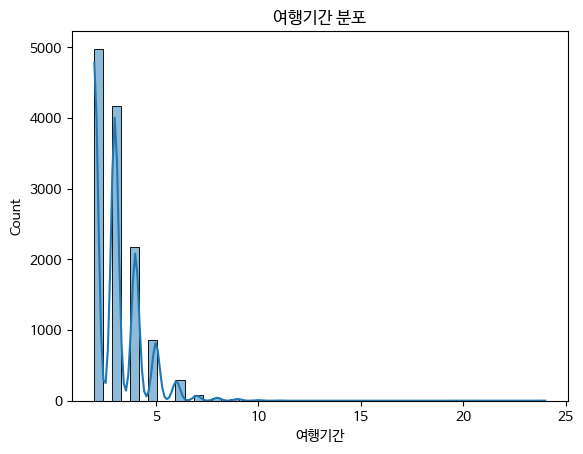

In [64]:
# 여행 기간 분포 확인
sns.histplot(preprocess_travel_notnull['여행기간'], bins = 50, kde = True)
plt.title("여행기간 분포")
plt.show()

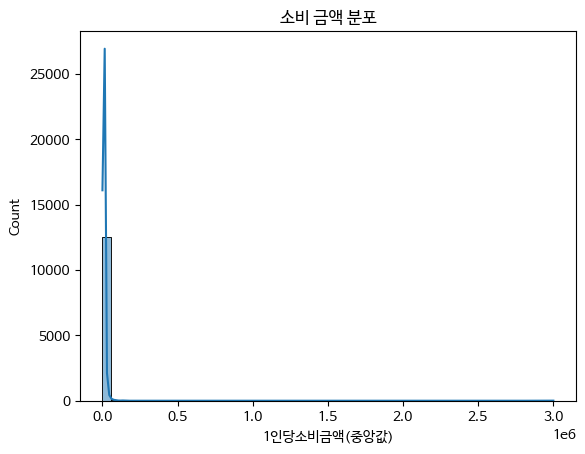

In [65]:
sns.histplot(preprocess_travel_notnull['1인당소비금액(중앙값)'], bins = 50, kde = True)
plt.title("소비 금액 분포")
plt.show()

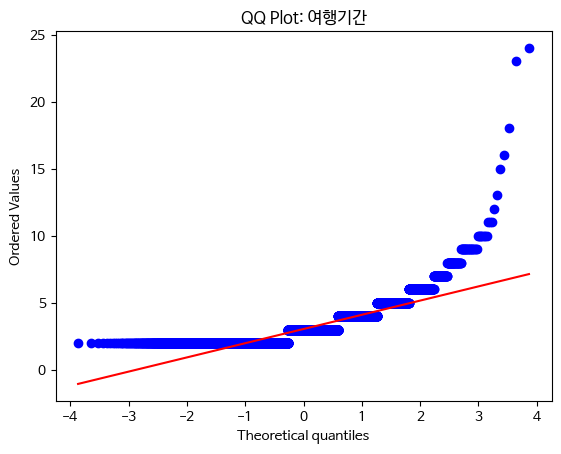

Shapiro-Wilk Test: stat = 0.7674, p-value = 2.5838074591800394e-85


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12622.
  res = hypotest_fun_out(*samples, **kwds)


In [66]:
# 정규성 검정

## QQ Plot
stats.probplot(preprocess_travel_notnull['여행기간'], dist="norm", plot=plt)
plt.title("QQ Plot: 여행기간")
plt.show()

## Shapiro-Wilk Test
stat, p = stats.shapiro(preprocess_travel_notnull['여행기간'])
print(f"Shapiro-Wilk Test: stat = {stat:.4f}, p-value = {p}")

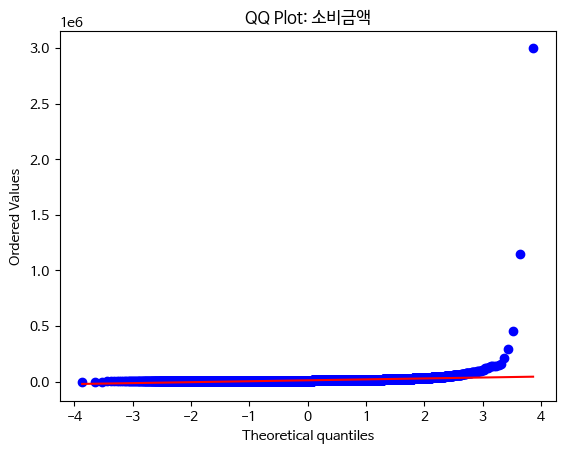

Shapiro-Wilk Test: stat = 0.0786, p-value = 7.753320968893128e-120


In [67]:
## QQ Plot
stats.probplot(preprocess_travel_notnull['1인당소비금액(중앙값)'], dist="norm", plot=plt)
plt.title("QQ Plot: 소비금액")
plt.show()

## Shapiro-Wilk Test
stat, p = stats.shapiro(preprocess_travel_notnull['1인당소비금액(중앙값)'])
print(f"Shapiro-Wilk Test: stat = {stat:.4f}, p-value = {p}")

In [68]:
preprocess_travel_notnull['여행기간'].skew()

np.float64(2.4809422983118465)

In [69]:
# 데이터 확인용 csv 파일 저장
preprocess_travel_notnull.to_csv('preprocess_travel_notnull_west.csv', index=False, encoding='utf-8')

# 가설 검정

In [70]:
# 여행자 수 컬럼 추가
preprocess_travel_notnull.loc[:, '여행자수'] = preprocess_travel_notnull['여행동반자수'] + 1

# 그룹별 데이터 나누기
grouped = preprocess_travel_notnull.groupby('여행자수')


# 여행 기간에 대한 Kruskal-Wallis
## for name, group in grouped : 그룹별 데이터에서 각 그룹의 이름(name)과 해당 그룹에 속한 데이터프레임(group)을 반복해서 꺼냄
## group['여행기간'].dropna() : 반복해서 꺼낸 그룹에서 여행기간 컬럼만 가져와서 결측치(NaN)를 제거한 Series로 만듦
## * : 언패킹 연산자, 위에서 만들어진 리스트를 함수 인자로 쪼개서 전달
KW_duration = kruskal(*[group['여행기간'].dropna() for name, group in grouped])

# 결과 출력
print("전국 여행 기간 Kruskal-Wallis:", KW_duration)

# 소비 금액에 대한 Kruskal-Wallis
KW_consume = kruskal(*[group['1인당소비금액(중앙값)'].dropna() for name, group in grouped])

# 결과 출력
print("전국 소비 금액 Kruskal-Wallis 결과:", KW_consume)

전국 여행 기간 Kruskal-Wallis: KruskalResult(statistic=np.float64(220.90770067726885), pvalue=np.float64(2.266502141648869e-36))
전국 소비 금액 Kruskal-Wallis 결과: KruskalResult(statistic=np.float64(503.13342917396716), pvalue=np.float64(1.229613919236952e-94))


/tmp/ipython-input-3412223227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocess_travel_notnull.loc[:, '여행자수'] = preprocess_travel_notnull['여행동반자수'] + 1


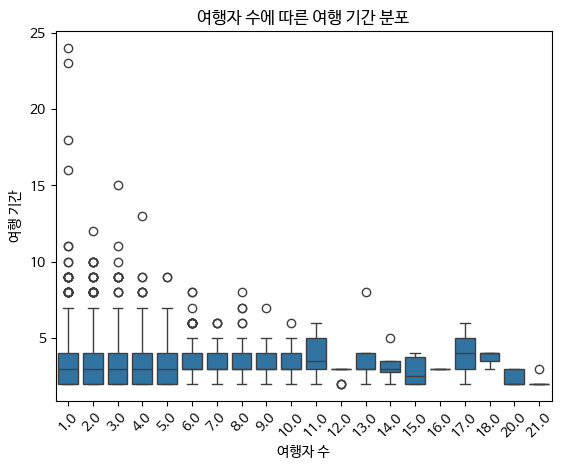

In [71]:
# 여행자 수 vs 여행 기간 (Kruskal) 시각화
## Boxplot (분포 + 중앙값 시각화)
sns.boxplot(x='여행자수', y='여행기간', data=preprocess_travel_notnull)
plt.title("여행자 수에 따른 여행 기간 분포")
plt.xlabel("여행자 수")
plt.ylabel("여행 기간")
plt.xticks(rotation=45)
plt.show()

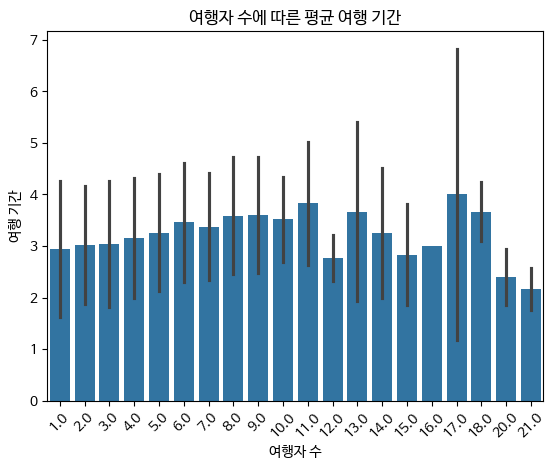

In [72]:
# 평균 & 표준편차 (barplot)
sns.barplot(x='여행자수', y='여행기간', data=preprocess_travel_notnull, errorbar='sd')
plt.title("여행자 수에 따른 평균 여행 기간")
plt.xlabel("여행자 수")
plt.ylabel("여행 기간")
plt.xticks(rotation=45)
plt.show()

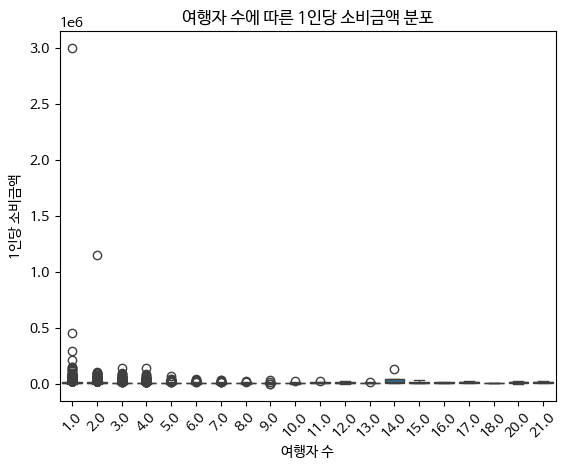

In [73]:
# 여행자 수 vs 1인당 소비금액(중앙값) (Kruskal 중심 해석)
## Boxplot (이상치 포함 전체 분포 시각화)
sns.boxplot(x='여행자수', y='1인당소비금액(중앙값)', data=preprocess_travel_notnull)
plt.title("여행자 수에 따른 1인당 소비금액 분포")
plt.xlabel("여행자 수")
plt.ylabel("1인당 소비금액")
plt.xticks(rotation=45)
plt.show()

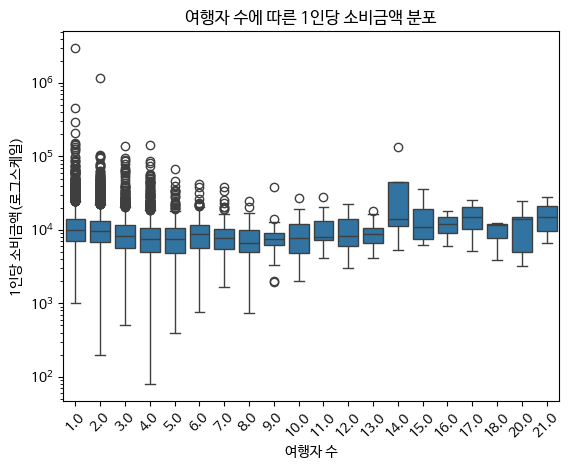

In [74]:
sns.boxplot(x='여행자수', y='1인당소비금액(중앙값)', data=preprocess_travel_notnull).set_yscale('log')
plt.title("여행자 수에 따른 1인당 소비금액 분포")
plt.xlabel("여행자 수")
plt.ylabel("1인당 소비금액(로그스케일)")
plt.xticks(rotation=45)
plt.show()

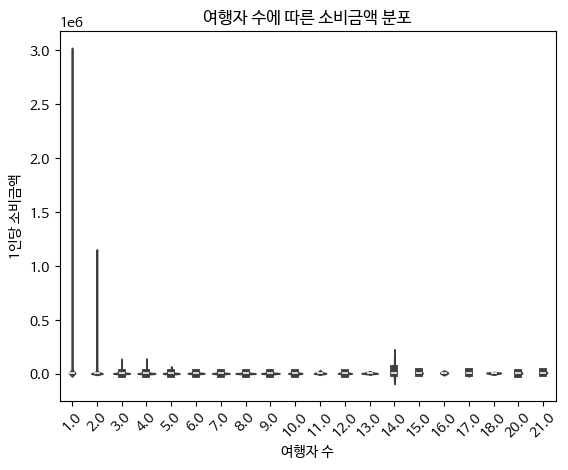

In [75]:
# Violinplot (분포 밀도 강조)
sns.violinplot(x='여행자수', y='1인당소비금액(중앙값)', data=preprocess_travel_notnull, inner='box')
plt.title("여행자 수에 따른 소비금액 분포")
plt.xlabel("여행자 수")
plt.ylabel("1인당 소비금액")
plt.xticks(rotation=45)
plt.show()

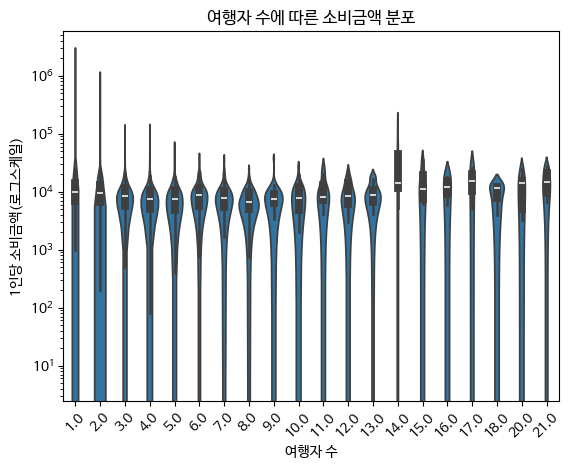

In [76]:
sns.violinplot(x='여행자수', y='1인당소비금액(중앙값)', data=preprocess_travel_notnull, inner='box').set_yscale('log')
plt.title("여행자 수에 따른 소비금액 분포")
plt.xlabel("여행자 수")
plt.ylabel("1인당 소비금액(로그스케일)")
plt.xticks(rotation=45)
plt.show()

In [77]:
preprocess_travel_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12622 entries, 0 to 14045
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   여행ID          12622 non-null  object        
 1   여행객ID         12622 non-null  object        
 2   여행시작일자        12622 non-null  datetime64[ns]
 3   여행종료일자        12622 non-null  datetime64[ns]
 4   1인당소비금액(중앙값)  12622 non-null  float64       
 5   동반자관계코드       12622 non-null  object        
 6   여행동반자수        12622 non-null  float64       
 7   여행기간          12622 non-null  int64         
 8   여행자수          12622 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(3)
memory usage: 1.5+ MB


In [78]:
preprocess_travel_notnull['동반자관계코드'].unique()

array(['혼자여행', '배우자,자녀', '알수없음', '연인', '배우자', '친구', '기타,자녀,친구', '자녀',
       '부모', '친인척,형제/자매', '기타,배우자,자녀,친구', '동료', '형제/자매', '배우자,부모,자녀',
       '자녀,형제/자매', '친인척', '배우자,부모,자녀,친인척', '연인,친구', '배우자,자녀,친인척',
       '배우자,친구', '부모,형제/자매', '기타,연인', '부모,자녀', '배우자,부모',
       '배우자,자녀,친인척,형제/자매', '연인,친목 단체/모임(동호회, 종교단체 등)', '배우자,자녀,형제/자매',
       '자녀,친인척,형제/자매', '기타', '부모,친인척', '부모,자녀,친인척', '배우자,친인척',
       '배우자,부모,자녀,형제/자매', '자녀,친인척', '친목 단체/모임(동호회, 종교단체 등)', '배우자,연인,자녀',
       '부모,자녀,친인척,형제/자매', '기타,친인척', '배우자,부모,형제/자매', '부모,자녀,조부모',
       '배우자,자녀,친구', '배우자,형제/자매', '기타,자녀', '동료,친구', '연인,형제/자매', '동료,연인',
       '자녀,친구', '친구,친인척', '부모,친인척,형제/자매', '기타,부모', '기타,배우자',
       '배우자,친인척,형제/자매', '기타,형제/자매', '기타,배우자,자녀,친인척', '친구,형제/자매',
       '배우자,친목 단체/모임(동호회, 종교단체 등)', '기타,친구', '배우자,자녀,조부모', '기타,배우자,친구',
       '자녀,친목 단체/모임(동호회, 종교단체 등)', '연인,친인척,형제/자매',
       '친목 단체/모임(동호회, 종교단체 등),형제/자매', '기타,배우자,자녀', '동료,배우자',
       '기타,배우자,자녀,친구,친인척,형제/자매', '부모,자녀,형제/자매', '배우자,부모,자녀,친인척,형제/자매',
       '기타,

In [85]:
# 전국 데이터프레임
df = preprocess_travel_notnull.copy()

REL_COL = '동반자관계코드'      # 관계 코드가 들어있는 컬럼명

# 1) 문자열 → 토큰 리스트 정규화
def normalize_tokens(s: str) -> list[str]:
    if pd.isna(s) or str(s).strip()=='':
        return []
    s = str(s)
    s = re.sub(r'\(.*?\)', '', s)      # 괄호 내용 제거
    s = s.replace(' ', '')
    s = re.sub(r'[\/\+\|;·]', ',', s)  # 다양한 구분자를 콤마로 통일
    s = re.sub(r',+', ',', s).strip(',')
    tokens = [t for t in s.split(',') if t]
    return tokens

# 2) 키워드 사전(필요시 확장)
family_keywords = {"배우자", "자녀", "부모", "조부모", "형제/자매", "형제", "자매", "친인척"}
lover_keywords  = {"연인"}
friend_keywords = {"친구", "지인", "동료"}
group_keywords  = {"단체", "모임", "동호회", "종교단체", "친목단체", "친목단체/모임", "친목 단체", "친목 단체/모임"}
alone_keyword   = "혼자여행"

# 3) 대표 분류 (우선순위: 가족형 > 연인형 > 모임형 > 친구/지인형 > 혼자여행 > 기타형)
def classify_travel_type(raw: str) -> str:
    tokens = normalize_tokens(raw)
    # 가족형
    if any(t in family_keywords for t in tokens):
        return "가족형"
    # 연인형
    if any(t in lover_keywords for t in tokens):
        return "연인형"
    # 모임형
    if any(t in group_keywords for t in tokens):
        return "모임형"
    # 친구/지인형
    if any(t in friend_keywords for t in tokens):
        return "친구/지인형"
    # 혼자여행
    if alone_keyword in tokens:
        return "혼자여행"
    # 기타형
    return "기타형"

# 4) 적용: 대표 분류 컬럼
df['동반자유형(우선)'] = df[REL_COL].apply(classify_travel_type)

# 5) 다중 플래그(원하면 사용): 한 여행건이 어떤 키워드를 포함하는지 0/1로 보존
def flags_from_tokens(raw: str) -> dict:
    tokens = normalize_tokens(raw)
    return {
        '가족형_flag'    : int(any(t in family_keywords for t in tokens)),
        '연인형_flag'    : int(any(t in lover_keywords  for t in tokens)),
        '친구/지인형_flag': int(any(t in friend_keywords for t in tokens)),
        '모임형_flag'    : int(any(t in group_keywords  for t in tokens)),
        '혼자여행_flag'  : int(alone_keyword in tokens),
    }

flag_df = df[REL_COL].apply(flags_from_tokens).apply(pd.Series)
df = pd.concat([df, flag_df], axis=1)

# 6) 결과 확인
print(df[['동반자관계코드','동반자유형(우선)','가족형_flag','연인형_flag','친구/지인형_flag','모임형_flag','혼자여행_flag']].head())
print()
print("유형 분포(건수):")
print(df['동반자유형(우선)'].value_counts())


  동반자관계코드 동반자유형(우선)  가족형_flag  연인형_flag  친구/지인형_flag  모임형_flag  혼자여행_flag
0    혼자여행      혼자여행         0         0            0         0          1
1  배우자,자녀       가족형         1         0            0         0          0
3    혼자여행      혼자여행         0         0            0         0          1
4    알수없음       기타형         0         0            0         0          0
5      연인       연인형         0         1            0         0          0

유형 분포(건수):
동반자유형(우선)
가족형       4150
혼자여행      3407
연인형       1951
기타형       1820
친구/지인형    1239
모임형         55
Name: count, dtype: int64


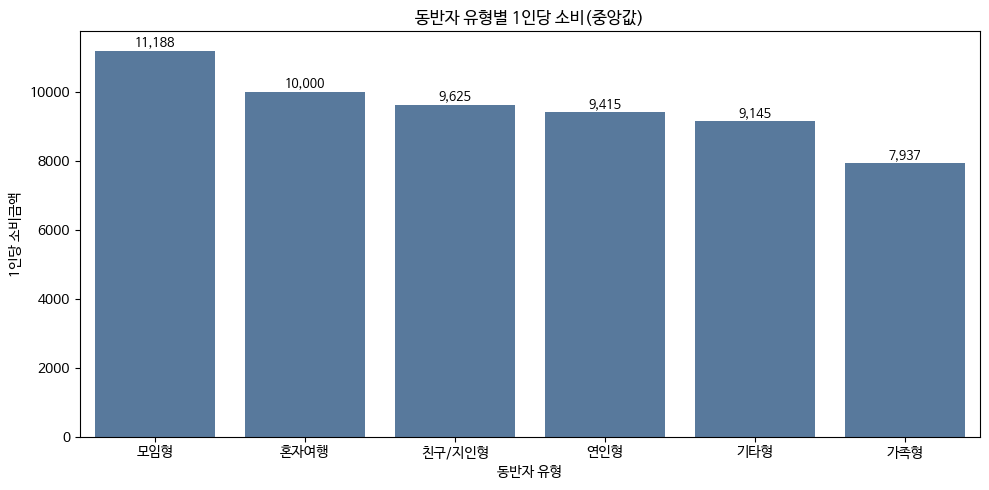

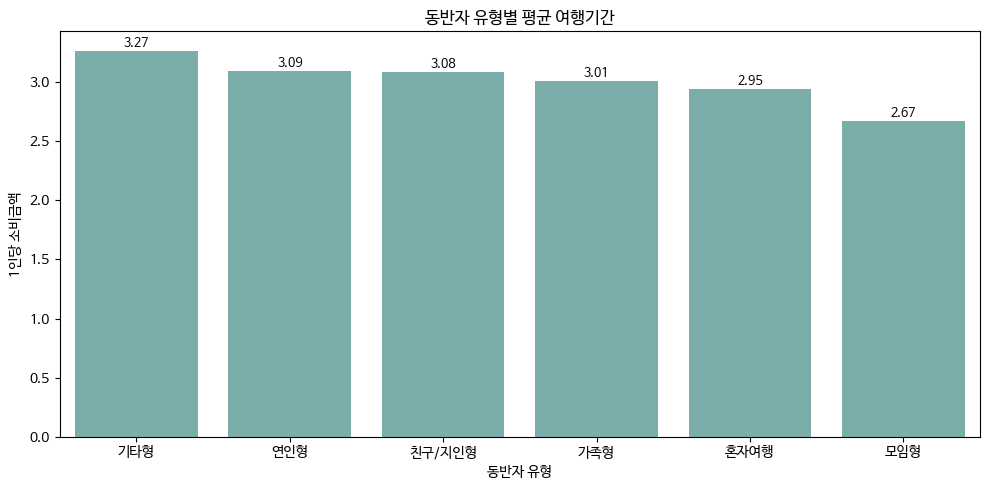

In [86]:
# 그룹별 1인당 소비(중앙값)
g_median = (df.groupby('동반자유형(우선)')['1인당소비금액(중앙값)']
              .median().reset_index()
              .sort_values('1인당소비금액(중앙값)', ascending=False))

plt.figure(figsize=(10,5))
ax = sns.barplot(data=g_median, x='동반자유형(우선)', y='1인당소비금액(중앙값)', color='#4C78A8')
plt.title('동반자 유형별 1인당 소비(중앙값)')
plt.xlabel("동반자 유형")
plt.ylabel("1인당 소비금액")
plt.xticks(rotation=0)
plt.tight_layout()

for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value:,.0f}',   # 천 단위 콤마, 정수 표시
                (p.get_x() + p.get_width() / 2., value),
                ha='center', va='bottom',
                fontsize=9, color='black',
                xytext=(0, 0), textcoords='offset points')

plt.show()



# 그룹별 평균 여행기간
g_mean = (df.groupby('동반자유형(우선)')['여행기간']
            .mean().reset_index()
            .sort_values('여행기간', ascending=False))

plt.figure(figsize=(10,5))
ax2 = sns.barplot(data=g_mean, x='동반자유형(우선)', y='여행기간', color='#72B7B2')
plt.title('동반자 유형별 평균 여행기간')
plt.xlabel("동반자 유형")
plt.ylabel("1인당 소비금액")
plt.xticks(rotation=0)
plt.tight_layout()

for p in ax2.patches:
    value = p.get_height()
    ax2.annotate(f'{value:,.2f}',   # 천 단위 콤마, 정수 표시
                (p.get_x() + p.get_width() / 2., value),
                ha='center', va='bottom',
                fontsize=9, color='black',
                xytext=(0, 0), textcoords='offset points')

plt.show()